# Análisis de paquetes

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utils as utils

importing Jupyter notebook from utils.ipynb


Graficar entropia a medida que llegan paquetes

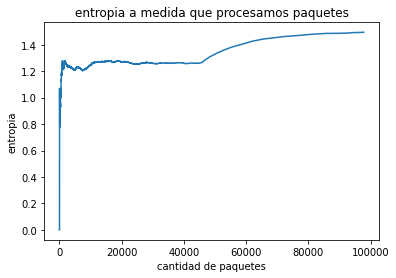

In [2]:
plt.plot(utils.get_entropy())
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [3]:
unicast_broadcast_symbol, protocol, percent_unicast, percent_broadcast , symbol_proba= utils.show_source()
print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)

percent unicast 0.57704
percent broadcast 0.42295


- Porcentaje de cada protocolo

In [4]:
percent_per_protocol = {p : 0 for p in np.unique(protocol)}


for s, proba in symbol_proba.items():
    percent_per_protocol[s[0]] += proba

print("porcentaje por protocolo \n", percent_per_protocol)


porcentaje por protocolo 
 {' 2048': 0.8752800000000001, ' 2054': 0.01475, ' 2697': 0.00019, ' 34525': 0.10977}


- Gráfico de la fuente

[]

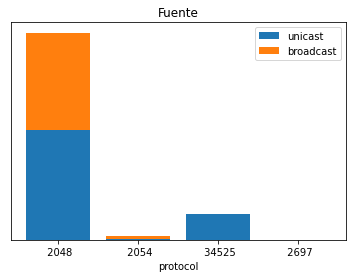

In [5]:
protocols_unique = np.unique(protocol)
unicast = {}
broadcast = {}

for p in protocols_unique:
    if((p, 'UNICAST') in list(symbol_proba.keys())):
        unicast[p] = symbol_proba[(p, 'UNICAST')] 
    else:
        if(not (p, 'BROADCAST') in symbol_proba.keys()):
            unicast[p] = 0
    if((p, 'BROADCAST') in list(symbol_proba.keys())):
        broadcast[p] = symbol_proba[(p, 'BROADCAST')] 
    else:
        if(not (p, 'UNICAST') in symbol_proba.keys()):
            broadcast[p] = 0

fig, ax = plt.subplots()

ax.bar(unicast.keys(), list(unicast.values()), label = "unicast")
ax.bar(broadcast.keys(), list(broadcast.values()), bottom=list(unicast.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Fuente")
ax.legend()
ax.set_yticks([])

- Información de los símbolos

'UNICAST', 2048
'BROADCAST', 2048
'UNICAST', 34525
'BROADCAST', 2054
'UNICAST', 2054
'BROADCAST', 2697


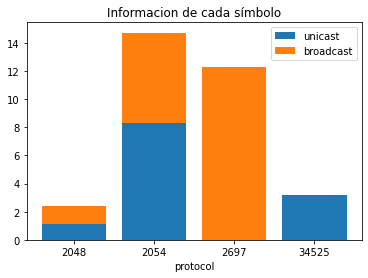

In [6]:
unicastRes, broadcastRes, sumRes, info_symbol = utils.informationForSymbol()

fig, ax = plt.subplots()
ax.bar(unicastRes.keys(), list(unicastRes.values()), label = "unicast")
ax.bar(broadcastRes.keys(), list(broadcastRes.values()), bottom=list(unicastRes.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Informacion de cada símbolo")
ax.legend()

[None, None, None, None, None, None, None, None, None, None, None, None]

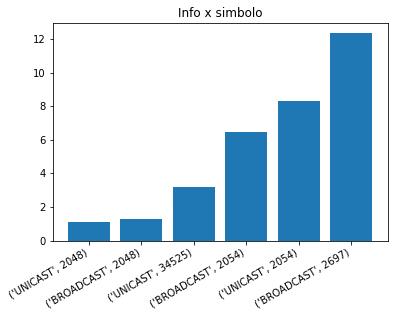

In [16]:
fig, ax = plt.subplots()
ax.set_title("Info x simbolo")
ax.bar(info_symbol.keys(), info_symbol.values())
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')